In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

# Chapter 3

In [2]:
resp = nsfg.ReadFemResp()

In [3]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [4]:
under_18 = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')
under_18


Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'numkdhh')

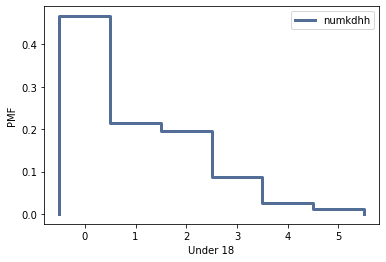

In [5]:
thinkplot.Pmf(under_18)
thinkplot.Config(xlabel='Under 18', ylabel='PMF')

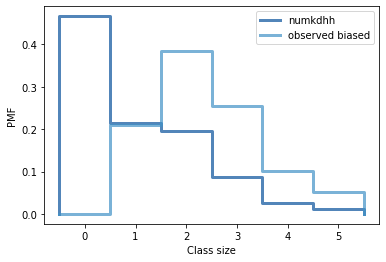

In [6]:
biased_pmf_under18 = BiasPmf(under_18, label='observed biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([under_18, biased_pmf_under18])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [7]:
under_18.Mean()


1.024205155043831

In [8]:
biased_pmf_under18.Mean()

2.403679100664282

In [9]:
def pmfmean(pmf):

    mean = 0.0
    #iterate throught the dict p(i) * x(i)
    for index,value in pmf.Items():
        
      
        mean +=  index * value
    return mean


In [10]:
pmfmean2 = under_18.Mean()
print(pmfmean2)

1.024205155043831


In [11]:
pmfmean(under_18)

1.024205155043831

In [12]:
def pmfvar(pmf, mean):

    var = 0
    #iterate throught the dict p(i) * x(i)
    for index,value in pmf.Items():
        
      
       var += value * ((index - mean)**2)
    return var


In [13]:
pmfvar(under_18, pmfmean2)

1.4128643263531195

In [14]:
under_18.Var()

1.4128643263531195

# Chapter 4

In [15]:
live, firsts, others = first.MakeFrames()

In [16]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [17]:
PercentileRank(others.totalwgt_lb, 5.3)

6.4625131995776135

# I was a premature baby

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?



In [18]:
numbers = np.random.random(1000)

In [19]:
pmfRan = thinkstats2.Pmf(numbers, label='1000 random')

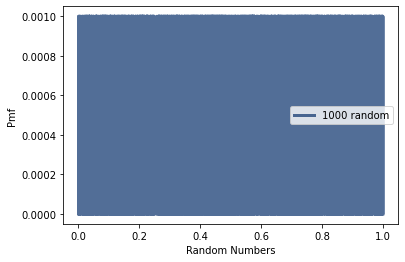

In [20]:
thinkplot.Pmf(pmfRan)
thinkplot.Config(xlabel='Random Numbers', ylabel='Pmf')

The values are close to same probality, because randoming pick number has 
0 to 10, I think. Random chance to picked, same idea with dice, if rolled 1000 time 1 to 6 would have same look. 

In [21]:
Now plot the CDF. Is the distribution uniform?

Object `uniform` not found.


In [ ]:
Now plot the CDF. Is the distribution uniform

In [22]:
random_cdf = thinkstats2.Cdf(numbers, label='Random')

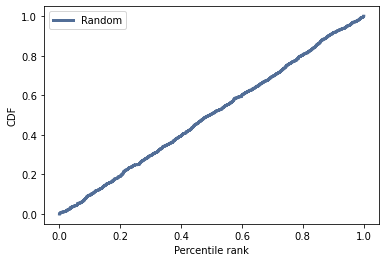

In [23]:
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

Yes the CDF is uniform, becuase it goes by IQR and are data has rank 10 being highest, and 0 being the lowest, with equal chance of randome pulling number from the sample the rank is uniformally.